<a href="https://colab.research.google.com/github/Tushar-Nagar-64/honours_coursework/blob/main/Honours_Stellar_Astro_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LE SOLVER

In [210]:
from IPython.display import display, Math, Latex
import numpy as np
import scipy.interpolate as scipy
np.seterr(divide='ignore', invalid='ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [211]:
dx = 0.001
x0 = 0
y0 = 1
z0 = 0

In [212]:
def y(x,n):
  return 1 - ((1/6)*x**2) +((n/120)*x**4) 

def z(x,n):
  return (-x/3)+(n*x**3/30)

def dz(x,y,z,n):
  return (-1/x**2)*((2*x*z)+(x**2)*y**n)

In [213]:
x = x0
y = y0
z = z0
n=3

xvals = []
yvals = []
zvals = []

z = z-(dx/3)
zvals.append(z)
y = y+dx*z
yvals.append(y)
x=x+dx
xvals.append(x)

while y>=0:
  z = z+(dx*dz(x,y,z,n))
  zvals.append(z)
  y = y+(dx*z)
  yvals.append(y)
  x=x+dx
  xvals.append(x)

In [214]:
print(xvals)
print(yvals)
print(zvals)

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.010000000000000002, 0.011000000000000003, 0.012000000000000004, 0.013000000000000005, 0.014000000000000005, 0.015000000000000006, 0.016000000000000007, 0.017000000000000008, 0.01800000000000001, 0.01900000000000001, 0.02000000000000001, 0.02100000000000001, 0.022000000000000013, 0.023000000000000013, 0.024000000000000014, 0.025000000000000015, 0.026000000000000016, 0.027000000000000017, 0.028000000000000018, 0.02900000000000002, 0.03000000000000002, 0.03100000000000002, 0.03200000000000002, 0.03300000000000002, 0.03400000000000002, 0.035000000000000024, 0.036000000000000025, 0.037000000000000026, 0.03800000000000003, 0.03900000000000003, 0.04000000000000003, 0.04100000000000003, 0.04200000000000003, 0.04300000000000003, 0.04400000000000003, 0.04500000000000003, 0.046000000000000034, 0.047000000000000035, 0.048000000000000036, 0.04900000000000004, 0.05000000000000004, 0.05100000000000004, 0.0520000000000000

In [215]:
len(xvals)

6901

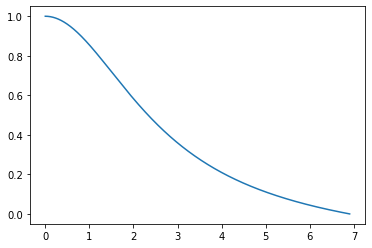

In [216]:
plt.plot(xvals,yvals)
plt.show()

In [217]:
print(xvals[-1],zvals[-1],yvals[-1])

6.901000000000639 -0.0423643519647143 -2.2801687735821655e-05


#Q2A

In [120]:
m = np.linspace(0.01,1,num=100)
#temp = 2e7
#t9 = temp/10e9
#g11 = 1+3.82*t9+(1.51*t9**2)+(0.144*t9**3)-(0.0114*t9**4)

# set alpha, changes for each star type
#alpha = 7.2e9
#K = 9.43e13
gamma = 3

#def epp(rhoc):
  #return 2.57e4*2*g11*rhoc*((0.715)**2)*(t9**(-2/3))*np.exp(-3.381/(t9**(1/3)))

In [176]:
gamma = 1.67
n=1.5

rhoc = 46
drho = 0.5
final = 0

while final<3.84e33:

  rhoc = rhoc+drho

  alpha = (2e33/((4*np.pi)*rhoc*(3.65**2)*0.2))**(1/3)
  K = ((alpha**2)*4*np.pi*6.67e-8)/((n+1)*rhoc**((1/n)-1))

  def mexp(x,z):
    return 4*np.pi*alpha**3*rhoc*(-(x**2)*z)

  mass = []
  mass2= []

  for i in range(len(xvals)):
    mass.append(mexp(xvals[i],zvals[i]))

  for i in range(len(mass)):
    mass2.append(mass[i]/np.max(mass))

  #massenc = []

  #for i in range(len(mass)):
    #massenclosed=mass[i]
    #for j in range(len(mass)):
      #if j<i:
        #massenclosed = mass[i]-mass[j]

    #massenc.append(massenclosed)

  inter = scipy.interp1d(mass2,xvals)

  x2 = []

  for i in range(len(m)):
    x2.append(inter(m[i]))

  inter2 = scipy.interp1d(xvals,yvals)

  y2 = []

  for i in range(len(x2)):
    if inter2((x2[i]))<0:
      y2.append(0)
    else:
      y2.append(inter2(x2[i]))


  rho = []

  for i in range(len(y2)):
    rho.append(rhoc*y2[i]**n)

  P = []
  for i in range(len(rho)):
    P.append(K*rho[i]**gamma)

  #now solving for T

  T = []
  for i in range(len(P)):
    coeff = [2.52e-15,0,0,rho[i]*1.38e-16*6.02e23/0.61,-P[i]]
    sols = np.roots(coeff)
    for i in range(4):
      if sols[i]>0 and np.iscomplex(sols[i])==False:
        T.append(sols[i])
    #print(T)

  t9 = []
  for i in range(len(T)):
    t9.append(T[i]/1e9)

  g11 = []
  for i in range(len(t9)):
    g11.append(1+3.82*t9[i]+(1.51*t9[i]**2)+(0.144*t9[i]**3)-(0.0114*t9[i]**4))
  
  #we used rho[i] for egen here, not rhoc
  egen = []
  for i in range(len(g11)):
    egen.append(2.57e4*2*g11[i]*rho[i]*((0.715)**2)*(t9[i]**(-2/3))*np.exp(-3.381/(t9[i]**(1/3)))*2e31)

  egen_specific = []
  for i in range(len(g11)):
    egen_specific.append(2.57e4*2*g11[i]*rho[i]*((0.715)**2)*(t9[i]**(-2/3))*np.exp(-3.381/(t9[i]**(1/3))))

  final = sum(egen)

print(rhoc)
print(alpha*3.65)
print(T[0:10])

48.0
39259725104.15138
[(13396767.182216503+0j), (13137998.687679747+0j), (12919774.834761024+0j), (12724033.1687931+0j), (12543296.174742512+0j), (12373554.93531606+0j), (12212345.029535929+0j), (12058015.337149655+0j), (11909390.752946083+0j), (11765598.948023127+0j)]


In [177]:
alpha*3.65/1e10

3.9259725104151384

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


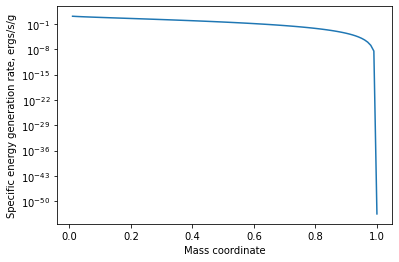

In [186]:
plt.plot(m,egen_specific)
plt.yscale('log')
plt.xlabel('Mass coordinate')
plt.ylabel('Specific energy generation rate, ergs/s/g')
plt.show()

In [184]:
lum = []

for i in range(len(m)):
  lum.append(sum(egen[0:i]))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


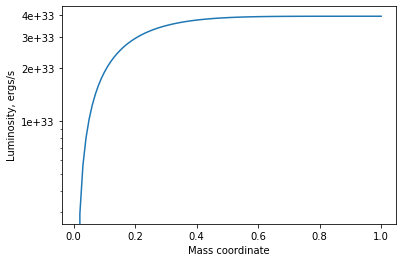

In [209]:
plt.plot(m,lum)
plt.yscale('log')
plt.yticks([1e33,2e33,3e33,4e33],labels=[1e33,2e33,3e33,4e33])
plt.xlabel('Mass coordinate')
plt.ylabel('Luminosity, ergs/s')
plt.show()

#Q2B

In [255]:
gamma = 4/3
n=3

rhoc = 0.03
drho = 0.0002
final = 0

while final<4e7:

  rhoc = rhoc+drho

  print(rhoc)

  alpha = (2e33*1e5/((4*np.pi)*rhoc*(3.65**2)*0.2))**(1/3)
  K = ((alpha**2)*4*np.pi*6.67e-8)/((n+1)*rhoc**((1/n)-1))

  def mexp(x,z):
    return 4*np.pi*alpha**3*rhoc*(-(x**2)*z)

  mass = []
  mass2= []

  for i in range(len(xvals)):
    mass.append(mexp(xvals[i],zvals[i]))

  for i in range(len(mass)):
    mass2.append(mass[i]/np.max(mass))

  #massenc = []

  #for i in range(len(mass)):
    #massenclosed=mass[i]
    #for j in range(len(mass)):
      #if j<i:
        #massenclosed = mass[i]-mass[j]

    #massenc.append(massenclosed)

  inter = scipy.interp1d(mass2,xvals)

  x2 = []

  for i in range(len(m)):
    x2.append(inter(m[i]))

  inter2 = scipy.interp1d(xvals,yvals)

  y2 = []

  for i in range(len(x2)):
    if inter2((x2[i]))<0:
      y2.append(0)
    else:
      y2.append(inter2(x2[i]))


  rho = []

  for i in range(len(y2)):
    rho.append(rhoc*y2[i]**n)

  P = []
  for i in range(len(rho)):
    P.append(K*rho[i]**gamma)

  #now solving for T

  T = []
  for i in range(len(P)):
    coeff = [2.52e-15,0,0,rho[i]*1.38e-16*6.02e23/0.61,-P[i]]
    sols = np.roots(coeff)
    for i in range(4):
      if sols[i]>0 and np.iscomplex(sols[i])==False:
        T.append(sols[i])
    #print(T)
  final = T[0]
  print(T[0])

  t9 = []
  for i in range(len(T)):
    t9.append(T[i]/1e9)

  g11 = []
  for i in range(len(t9)):
    g11.append(1-2*t9[i]+(3.41*t9[i]**2)-(2.43*t9[i]**3))

  #we used rho[i] for egen here, not rhoc
  egen = []
  for i in range(len(g11)):
    egen.append(8.25e25*g11[i]*(t9[i]**(-2/3))*(np.exp((-15.231*(t9[i]**(-1/3)))-(t9[i]/0.8)**2))*2e33*1e3)

  egen_specific = []
  for i in range(len(g11)):
    egen.append(8.25e25*g11[i]*(t9[i]**(-2/3))*(np.exp((-15.231*(t9[i]**(-1/3)))-(t9[i]/0.8)**2)))

  lum = sum(egen)

print(rhoc)
print((alpha*6.9)/6.96e10)
print((lum/3.84e33)/1e7)
print(T[0:5])

0.030199999999999998
(38768074.016524225+0j)
0.030399999999999996
(38853466.52593337+0j)
0.030599999999999995
(38938485.32334088+0j)
0.030799999999999994
(39023134.47088522+0j)
0.030999999999999993
(39107417.96051549+0j)
0.03119999999999999
(39191339.715648316+0j)
0.03139999999999999
(39274903.592775226+0j)
0.03159999999999999
(39358113.383022375+0j)
0.03179999999999999
(39440972.8136644+0j)
0.03199999999999999
(39523485.549593754+0j)
0.032199999999999986
(39605655.194747336+0j)
0.032399999999999984
(39687485.29349183+0j)
0.03259999999999998
(39768979.331969485+0j)
0.03279999999999998
(39850140.73940489+0j)
0.03299999999999998
(39930972.88937533+0j)
0.03319999999999998
(40011479.101044506+0j)
0.03319999999999998
559.6656153133694
(9917.357962599297+0j)
[(40011479.101044506+0j), (39377960.13224089+0j), (38841869.43838889+0j), (38359552.20441045+0j), (37912966.34101684+0j)]


In [256]:
mencl = []
for i in range(len(m)):
  mencl.append(m[i]*2e33*1e5)

lum = []

for i in range(len(m)):
  lum.append(sum(egen[0:i]))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


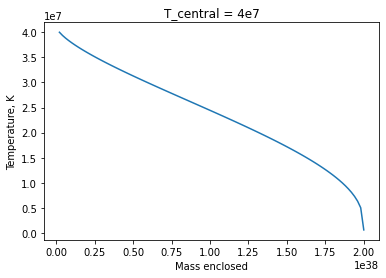

In [257]:
plt.plot(mencl,T)
plt.title('T_central = 4e7')
plt.yscale('linear')
plt.xlabel('Mass enclosed')
plt.ylabel('Temperature, K')
plt.show()

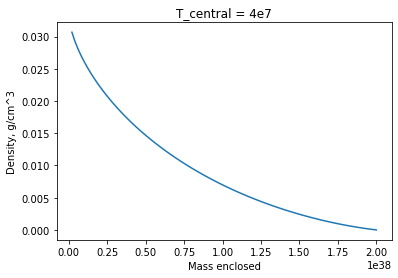

In [258]:
plt.plot(mencl,rho)
plt.title('T_central = 4e7')
plt.yscale('linear')
plt.xlabel('Mass enclosed')
plt.ylabel('Density, g/cm^3')
plt.show()